In [1]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import bz2
import json
from urllib.parse import urlparse
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import glob
import pickle

In [3]:
from scipy import stats

In [4]:
def read_yearly(y):
    PATH = 'Fox_NY_' + str(y) + '/'
    nb = 1
    df2 = []
    dirs = glob.glob(os.path.join(PATH, "*.pkl"))

    for files in dirs:
        df1 = pd.read_pickle(PATH + str(nb)+ '_' + str(y) + '_' + 'FoxNYtimes.pkl')
        df2.append(df1)
        nb += 1
    return df2

In [5]:
years = [2015, 2016, 2017, 2018, 2019, 2020]

df_foxNy = pd.DataFrame()

for y in years:
    df_foxNy = df_foxNy.append(pd.concat(read_yearly(y)))
df_fox = pd.DataFrame()
df_ny = pd.DataFrame()

In [6]:
#The chosen key words are selected here
words_immigration = 'immigration|mexic|migrant|border|refugees'
words_terrorism = 'shoot|gun|kill|attack|massacre|victim|terroris|arm|violen|death'
words_ClimateChange = 'flood|greenhouse effect|CO2|global warming|pollution|glacier|ice pake melting|high temperatures|heat'
words_abortion = 'abort|fetus'
words_religion = 'God|Christian|Christianism|Belief|faith|prayer|commitment|islam|buddhism|hinduism|baptism|church|vatican|reincarnation|jesus'
words_racism = 'White|Black|Black lives matter|All lives matter|discrimination|Segregation|George Floyd|Slaver|White supremacy|Klu Klux Klan|KKK|Gunshot|Trials|Police|Death sentence'

In [7]:
from collections import namedtuple
import text2emotion as te

[nltk_data] Downloading package stopwords to C:\Users\François
[nltk_data]     CHARROIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\François
[nltk_data]     CHARROIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\François
[nltk_data]     CHARROIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Immigration

In [9]:
df_immi_t = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_immigration]
lista2 = ['immigration']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_immi_t = df_immi_t.append(newr, ignore_index=True)

In [10]:
res = stats.ttest_ind(df_immi_t[df_immi_t['journal']=="foxnews"][df_immi_t['emotion']=="fear"]['value'],
                      df_immi_t[df_immi_t['journal']=="nytimes"][df_immi_t['emotion']=="fear"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_immi_t[df_immi_t['journal']=="foxnews"][df_immi_t['emotion']=="happy"]['value'],
                       df_immi_t[df_immi_t['journal']=="nytimes"][df_immi_t['emotion']=="happy"]['value'],equal_var=True) 
res3 = stats.ttest_ind(df_immi_t[df_immi_t['journal']=="foxnews"][df_immi_t['emotion']=="angry"]['value'],
                       df_immi_t[df_immi_t['journal']=="nytimes"][df_immi_t['emotion']=="angry"]['value'],equal_var=True) 
res4 = stats.ttest_ind(df_immi_t[df_immi_t['journal']=="foxnews"][df_immi_t['emotion']=="surprise"]['value'],
                       df_immi_t[df_immi_t['journal']=="nytimes"][df_immi_t['emotion']=="surprise"]['value'],equal_var=True) 
res5 = stats.ttest_ind(df_immi_t[df_immi_t['journal']=="foxnews"][df_immi_t['emotion']=="sad"]['value'],
                       df_immi_t[df_immi_t['journal']=="nytimes"][df_immi_t['emotion']=="sad"]['value'],equal_var=True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

P-Value:1.0 T-Statistic:0.0


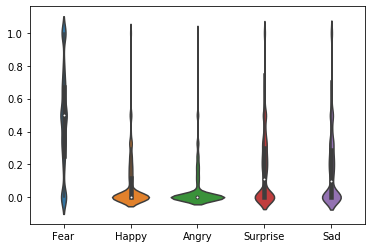

In [11]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_immi_t, palette="muted", split=True)

In [13]:
lst = [df_immi_t]
del lst     

## Terrorism

In [14]:
df_te_t = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_terrorism]
lista2 = ['terrorism']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_te_t = df_te_t.append(newr, ignore_index=True)

In [15]:
res = stats.ttest_ind(df_te_t[df_te_t['journal']=="foxnews"][df_te_t['emotion']=="fear"]['value'],
                      df_te_t[df_te_t['journal']=="nytimes"][df_te_t['emotion']=="fear"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_te_t[df_te_t['journal']=="foxnews"][df_te_t['emotion']=="happy"]['value'],
                       df_te_t[df_te_t['journal']=="nytimes"][df_te_t['emotion']=="happy"]['value'],equal_var=True) 
res3 = stats.ttest_ind(df_te_t[df_te_t['journal']=="foxnews"][df_te_t['emotion']=="angry"]['value'],
                       df_te_t[df_te_t['journal']=="nytimes"][df_te_t['emotion']=="angry"]['value'],equal_var=True) 
res4 = stats.ttest_ind(df_te_t[df_te_t['journal']=="foxnews"][df_te_t['emotion']=="surprise"]['value'],
                       df_te_t[df_te_t['journal']=="nytimes"][df_te_t['emotion']=="surprise"]['value'],equal_var=True) 
res5 = stats.ttest_ind(df_te_t[df_te_t['journal']=="foxnews"][df_te_t['emotion']=="sad"]['value'],
                       df_te_t[df_te_t['journal']=="nytimes"][df_te_t['emotion']=="sad"]['value'],equal_var=True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

P-Value:1.0 T-Statistic:0.0


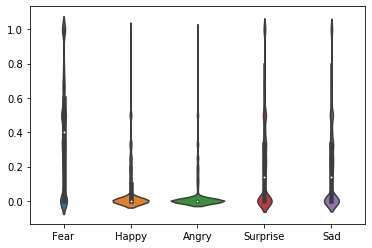

In [17]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_te_t, palette="muted", split=True)

In [19]:
lst = [df_te_t]
del lst     

## Climate change

In [21]:
df_cc_t = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_ClimateChange]
lista2 = ['climate change']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_cc_t = df_cc_t.append(newr, ignore_index=True)

In [22]:
res = stats.ttest_ind(df_cc_t[df_cc_t['journal']=="foxnews"][df_cc_t['emotion']=="fear"]['value'],
                      df_cc_t[df_cc_t['journal']=="nytimes"][df_cc_t['emotion']=="fear"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_cc_t[df_cc_t['journal']=="foxnews"][df_cc_t['emotion']=="happy"]['value'],
                       df_cc_t[df_cc_t['journal']=="nytimes"][df_cc_t['emotion']=="happy"]['value'],equal_var=True) 
res3 = stats.ttest_ind(df_cc_t[df_cc_t['journal']=="foxnews"][df_cc_t['emotion']=="angry"]['value'],
                       df_cc_t[df_cc_t['journal']=="nytimes"][df_cc_t['emotion']=="angry"]['value'],equal_var=True) 
res4 = stats.ttest_ind(df_cc_t[df_cc_t['journal']=="foxnews"][df_cc_t['emotion']=="surprise"]['value'],
                       df_cc_t[df_cc_t['journal']=="nytimes"][df_cc_t['emotion']=="surprise"]['value'],equal_var=True) 
res5 = stats.ttest_ind(df_cc_t[df_cc_t['journal']=="foxnews"][df_cc_t['emotion']=="sad"]['value'],
                       df_cc_t[df_cc_t['journal']=="nytimes"][df_cc_t['emotion']=="sad"]['value'],equal_var=True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

P-Value:1.0 T-Statistic:0.0


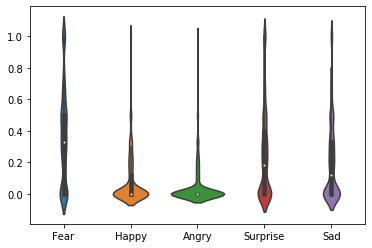

In [24]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_cc_t, palette="muted", split=True)

In [26]:
lst = [df_cc_t]
del lst     

## Abortion

In [28]:
df_ab_t = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_abortion]
lista2 = ['abortion']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_ab_t = df_ab_t.append(newr, ignore_index=True)

In [30]:
res = stats.ttest_ind(df_ab_t[df_ab_t['journal']=="foxnews"][df_ab_t['emotion']=="fear"]['value'],
                      df_ab_t[df_ab_t['journal']=="nytimes"][df_ab_t['emotion']=="fear"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_ab_t[df_ab_t['journal']=="foxnews"][df_ab_t['emotion']=="happy"]['value'],
                       df_ab_t[df_ab_t['journal']=="nytimes"][df_ab_t['emotion']=="happy"]['value'],equal_var=True) 
res3 = stats.ttest_ind(df_ab_t[df_ab_t['journal']=="foxnews"][df_ab_t['emotion']=="angry"]['value'],
                       df_ab_t[df_ab_t['journal']=="nytimes"][df_ab_t['emotion']=="angry"]['value'],equal_var=True) 
res4 = stats.ttest_ind(df_ab_t[df_ab_t['journal']=="foxnews"][df_ab_t['emotion']=="surprise"]['value'],
                       df_ab_t[df_ab_t['journal']=="nytimes"][df_ab_t['emotion']=="surprise"]['value'],equal_var=True) 
res5 = stats.ttest_ind(df_ab_t[df_ab_t['journal']=="foxnews"][df_ab_t['emotion']=="sad"]['value'],
                       df_ab_t[df_ab_t['journal']=="nytimes"][df_ab_t['emotion']=="sad"]['value'],equal_var=True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

Surprise   P-Value:0.8703105878100303 T-Statistic:0.1632860430845748
Sad   P-Value:0.8703105878100303 T-Statistic:0.1632860430845748


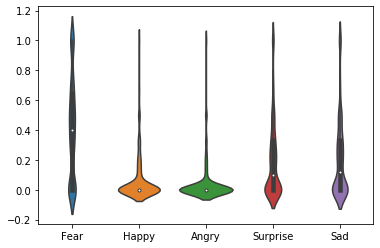

In [31]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_cc_t, palette="muted", split=True)

In [33]:
lst = [df_ab_t]
del lst  

## Religion

In [37]:
df_re_t = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_religion]
lista2 = ['religion']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)


    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_re_t = df_re_t.append(newr, ignore_index=True)

In [38]:
res = stats.ttest_ind(df_re_t[df_re_t['journal']=="foxnews"][df_re_t['emotion']=="fear"]['value'],
                      df_re_t[df_re_t['journal']=="nytimes"][df_re_t['emotion']=="fear"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_re_t[df_re_t['journal']=="foxnews"][df_re_t['emotion']=="happy"]['value'],
                       df_re_t[df_re_t['journal']=="nytimes"][df_re_t['emotion']=="happy"]['value'],equal_var=True) 
res3 = stats.ttest_ind(df_re_t[df_re_t['journal']=="foxnews"][df_re_t['emotion']=="angry"]['value'],
                       df_re_t[df_re_t['journal']=="nytimes"][df_re_t['emotion']=="angry"]['value'],equal_var=True) 
res4 = stats.ttest_ind(df_re_t[df_re_t['journal']=="foxnews"][df_re_t['emotion']=="surprise"]['value'],
                       df_re_t[df_re_t['journal']=="nytimes"][df_re_t['emotion']=="surprise"]['value'],equal_var=True) 
res5 = stats.ttest_ind(df_re_t[df_re_t['journal']=="foxnews"][df_re_t['emotion']=="sad"]['value'],
                       df_re_t[df_re_t['journal']=="nytimes"][df_re_t['emotion']=="sad"]['value'],equal_var=True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

P-Value:0.05232623718546879 T-Statistic:1.9405456190570267


In [ ]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_re_t, palette="muted", split=True)

In [ ]:
lst = [df_re_t]
del lst  

## Racism

In [ ]:
df_re_t = pd.DataFrame(columns=['emotion','value','journal'])

lista = [words_racism]
lista2 = ['racism']


df_fox_word = df_fox[df_fox['quotation'].str.contains([l for l in lista][0])]
count_fox = len(df_fox_word)
n = len(df_fox)

for quotation in df_fox_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)


    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "foxnews"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)
    

df_ny_word = df_ny[df_ny['quotation'].str.contains([l for l in lista][0])]
count_ny = len(df_ny_word)
m = len(df_ny)


for quotation in df_ny_word['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': "nytimes"}, name = 'x')
    df_ra_t = df_ra_t.append(newr, ignore_index=True)

In [ ]:
res = stats.ttest_ind(df_ra_t[df_ra_t['journal']=="foxnews"][df_ra_t['emotion']=="fear"]['value'],
                      df_ra_t[df_ra_t['journal']=="nytimes"][df_ra_t['emotion']=="fear"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_ra_t[df_ra_t['journal']=="foxnews"][df_ra_t['emotion']=="happy"]['value'],
                       df_ra_t[df_ra_t['journal']=="nytimes"][df_ra_t['emotion']=="happy"]['value'],equal_var=True) 
res3 = stats.ttest_ind(df_ra_t[df_ra_t['journal']=="foxnews"][df_ra_t['emotion']=="angry"]['value'],
                       df_ra_t[df_ra_t['journal']=="nytimes"][df_ra_t['emotion']=="angry"]['value'],equal_var=True) 
res4 = stats.ttest_ind(df_ra_t[df_ra_t['journal']=="foxnews"][df_ra_t['emotion']=="surprise"]['value'],
                       df_ra_t[df_ra_t['journal']=="nytimes"][df_ra_t['emotion']=="surprise"]['value'],equal_var=True) 
res5 = stats.ttest_ind(df_ra_t[df_ra_t['journal']=="foxnews"][df_ra_t['emotion']=="sad"]['value'],
                       df_ra_t[df_ra_t['journal']=="nytimes"][df_ra_t['emotion']=="sad"]['value'],equal_var=True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

In [ ]:
sns.violinplot(x = 'emotion', y = "value", hue="journal",
                    data=df_ra_t, palette="muted", split=True)

In [ ]:
lst = [df_ra_t]
del lst  